In [1]:
#Importing necessary Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Creating the data frame.
df = pd.read_csv("Zomato-data-.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
#Data Cleaning and Preparation
# (1) Convert the rate column to a float by removing denominator characters

def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
#get summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
#Checking for missing or null values
print(df.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


Text(0.5, 0, 'Type of restaurant')

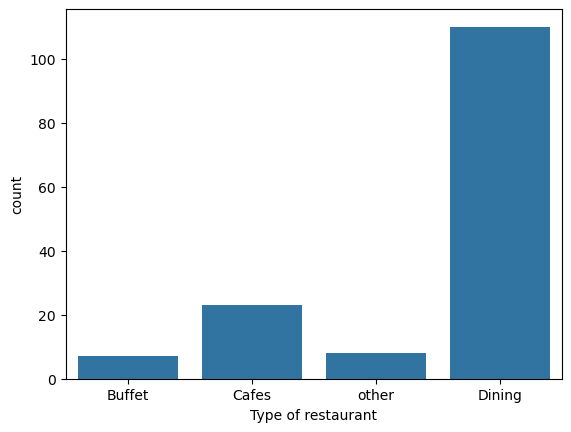

In [7]:
#Exploring Restaurant Types
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")
#Conclusion: The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'votes')

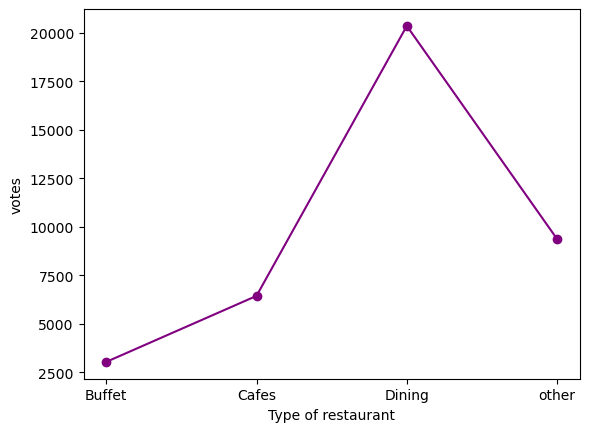

In [11]:
#count of votes for each category.
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='purple' , marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('votes')

In [12]:
#Identify the Most Voted Restaurant

max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

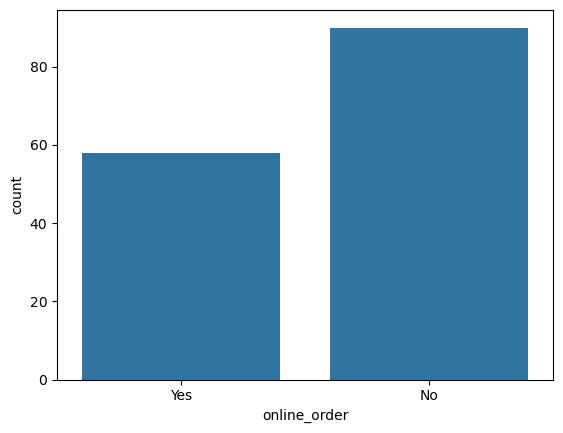

In [14]:
#Online Order Availability
sns.countplot(x=df['online_order'])
#Conclusion: This suggests that a majority of the restaurants do not accept online orders.

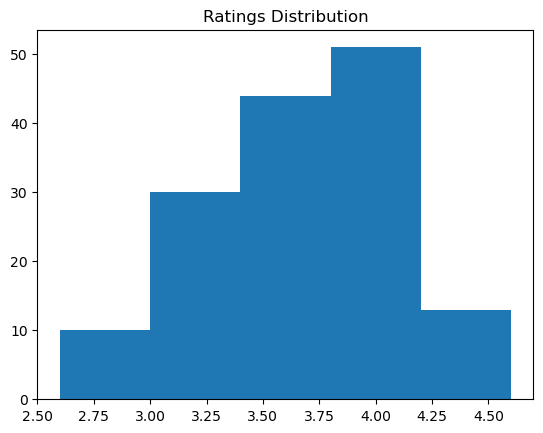

In [15]:
#Analyze Ratings
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()
#Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

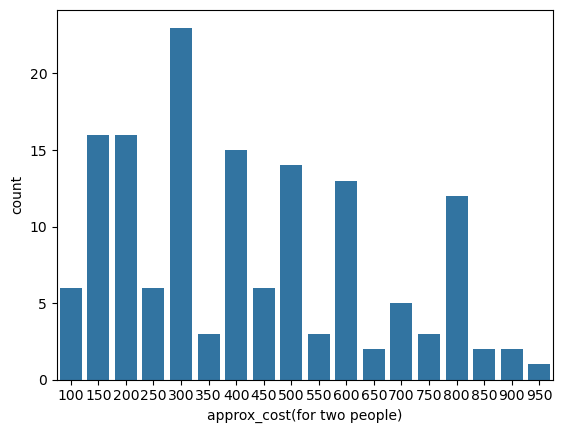

In [16]:
#Approximate Cost for Couples
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
#Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

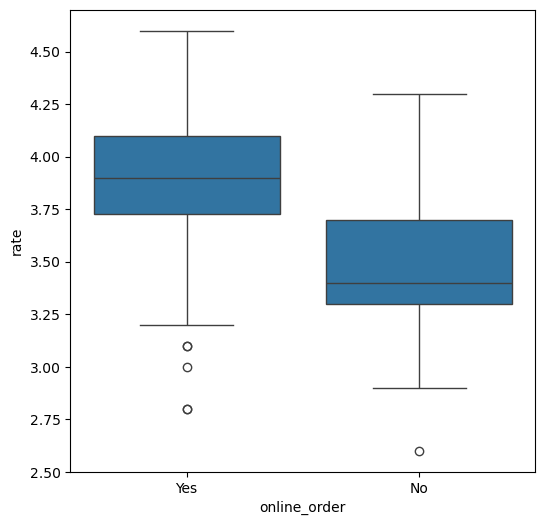

In [17]:
#Ratings Comparison - Online vs Offline Orders
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
#Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

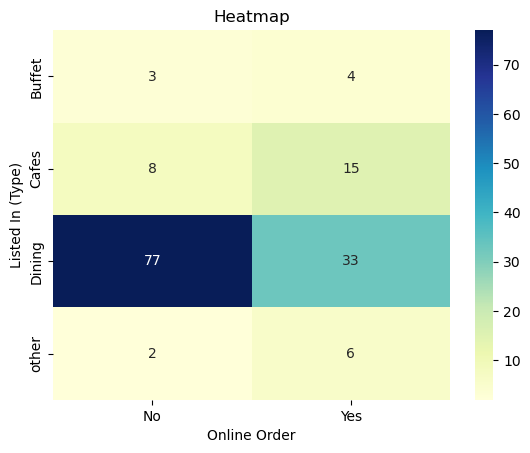

In [18]:
#Order Mode Preferences by Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()